In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [21]:
df=pd.read_csv("T20InternationalDataset.csv")

In [22]:
df.head(5).T

,0,1,2,3,4
powerPlay,0,0,0,1,0
AverageScore,153.142857,158.307692,158.307692,149.0,137.0
battingTeam,New Zealand,England,New Zealand,South Africa,Pakistan
bowlingTeam,Sri Lanka,South Africa,South Africa,New Zealand,Sri Lanka
city,Colombo,Durban,Durban,Chattogram,King City
delivery_left,51,0,23,85,79
score,94,204,79,39,44
CurrentRunRate,8.173913,10.2,4.886598,6.685714,6.439024
wicketsLeft,9,3,2,8,8
Run_In_Last5,42,79,25,37,36


In [23]:
df.shape

(131624, 13)

In [24]:
df.drop_duplicates(inplace=True)
df=df.dropna()

In [25]:
df.shape

(131376, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131376 entries, 0 to 131623
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   powerPlay         131376 non-null  int64  
 1   AverageScore      131376 non-null  float64
 2   battingTeam       131376 non-null  object 
 3   bowlingTeam       131376 non-null  object 
 4   city              131376 non-null  object 
 5   delivery_left     131376 non-null  int64  
 6   score             131376 non-null  int64  
 7   CurrentRunRate    131376 non-null  float64
 8   wicketsLeft       131376 non-null  int64  
 9   Run_In_Last5      131376 non-null  int64  
 10  Wickets_In_Last5  131376 non-null  int64  
 11  Final_Score       131376 non-null  int64  
 12  innings           131376 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 14.0+ MB


In [27]:
df=df.drop(['city','bowlingTeam','battingTeam'],axis=1)

In [28]:
df.describe()

,powerPlay,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
count,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000
mean,0.095931,149.232835,47.609411,91.290357,7.542423,6.650872,37.820873,1.480149,152.549469,1.468358
std,0.294497,17.757405,26.033564,39.863837,1.766739,2.107655,11.344272,1.141232,32.750937,0.499000
min,0.000000,57.666667,0.000000,6.000000,1.090909,0.000000,4.000000,0.000000,29.000000,1.000000
25%,0.000000,138.071429,26.000000,59.000000,6.324324,5.000000,30.000000,1.000000,132.000000,1.000000
50%,0.000000,149.000000,48.000000,87.000000,7.448276,7.000000,37.000000,1.000000,151.000000,1.000000
75%,0.000000,160.250000,70.000000,119.000000,8.625000,8.000000,45.000000,2.000000,173.000000,2.000000
max,1.000000,219.000000,98.000000,278.000000,16.600000,10.000000,90.000000,8.000000,278.000000,2.000000


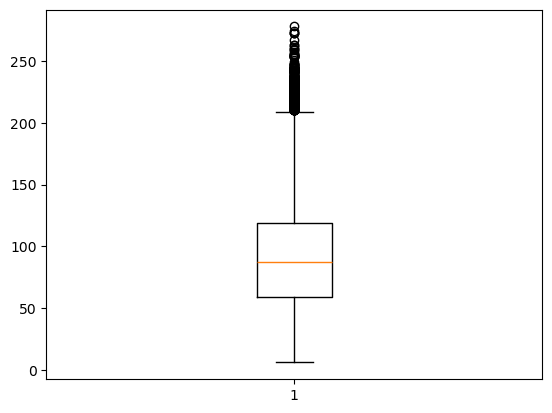

In [29]:
plt.boxplot(df['score'])
plt.show()

In [30]:
def replaced(df):
    for column in df.columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3 - Q1
        lower_bound= Q1 - 1.5 * IQR
        upper_bound= Q3+ 1.5 * IQR
        median=df[column].median()
        df[column]=df[column].where(
            (df[column]<lower_bound) | (df[column]>upper_bound),median
        )
        return df
    # Replace outliers
df = replaced(df)

In [31]:
df.shape

(131376, 10)

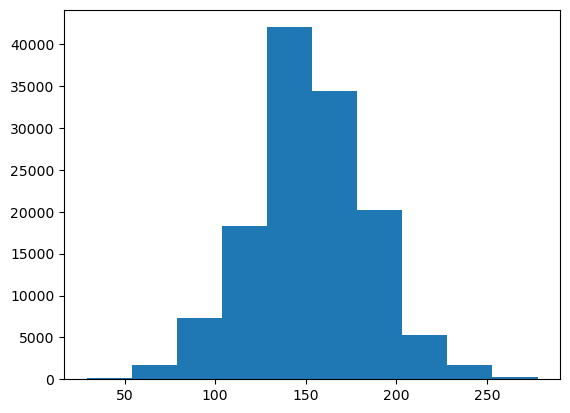

In [32]:
plt.hist(df['Final_Score'])
plt.show()

In [33]:
df.dtypes

powerPlay             int64
AverageScore        float64
delivery_left         int64
score                 int64
CurrentRunRate      float64
wicketsLeft           int64
Run_In_Last5          int64
Wickets_In_Last5      int64
Final_Score           int64
innings               int64
dtype: object

In [34]:
df.shape

(131376, 10)

In [35]:
df.shape

(131376, 10)

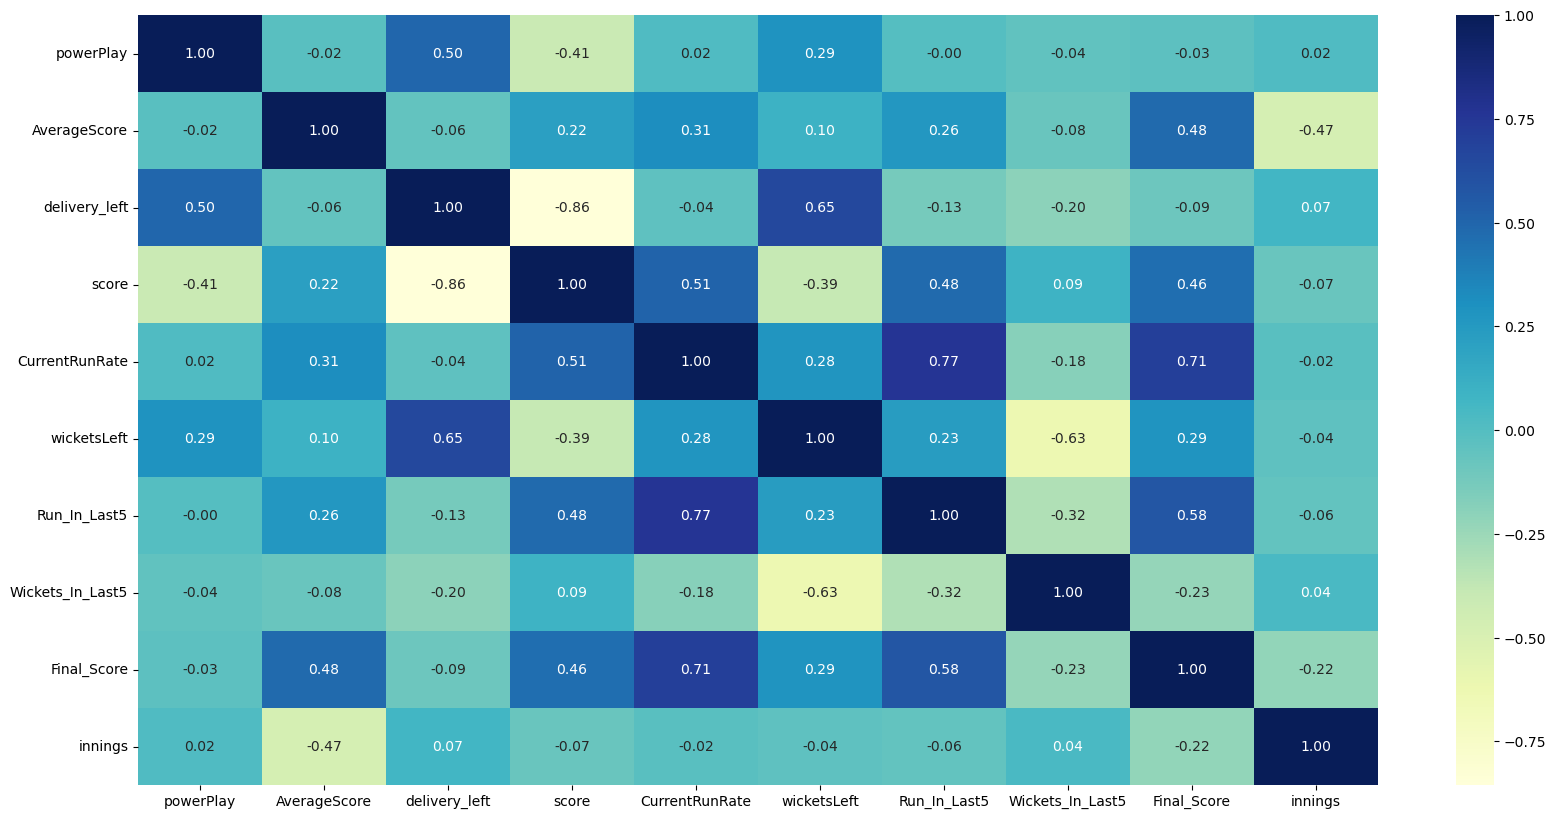

In [36]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap = "YlGnBu")
plt.show()

In [37]:
print(df.skew())

powerPlay           2.744170
AverageScore       -0.151529
delivery_left      -0.071740
score               0.526635
CurrentRunRate      0.430101
wicketsLeft        -0.597932
Run_In_Last5        0.492224
Wickets_In_Last5    0.734652
Final_Score         0.032123
innings             0.126824
dtype: float64


In [38]:
df.shape

(131376, 10)

In [39]:
x=df.drop("Final_Score",axis=1)
y=df["Final_Score"]

In [40]:
x.shape

(131376, 9)

In [41]:
y.shape

(131376,)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
print(".......RandomForest Regressor.......")
model.fit(x_train,y_train)

.......RandomForest Regressor.......


RandomForestRegressor()

In [44]:
y_pred=model.predict(x_train)
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error
print(" R2   : ",r2_score(y_train,y_pred))
print(" MSE  : ",mean_squared_error(y_train,y_pred))
print(" RMSE : ",root_mean_squared_error(y_train,y_pred))
print(" MAE  : ",mean_absolute_error(y_train,y_pred))

 R2   :  0.9887047890729505
 MSE  :  12.104467246058741
 RMSE :  3.479147488402689
 MAE  :  1.9252870955099453


In [45]:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error
print(" R2   : ",r2_score(y_test,y_pred))
print(" MSE  : ",mean_squared_error(y_test,y_pred))
print(" RMSE : ",root_mean_squared_error(y_test,y_pred))
print(" MAE  : ",mean_absolute_error(y_test,y_pred))

 R2   :  0.9265700081012958
 MSE  :  79.04628417070535
 RMSE :  8.890797724091206
 MAE  :  5.041780002331779


In [46]:
data=zip(y_pred,y_test)
df=pd.DataFrame(data,columns=["Actual","Predicted"])
df.tail(5)

,Actual,Predicted
26271,172.15,174
26272,165.86,183
26273,176.27,184
26274,229.21,233
26275,123.40,130


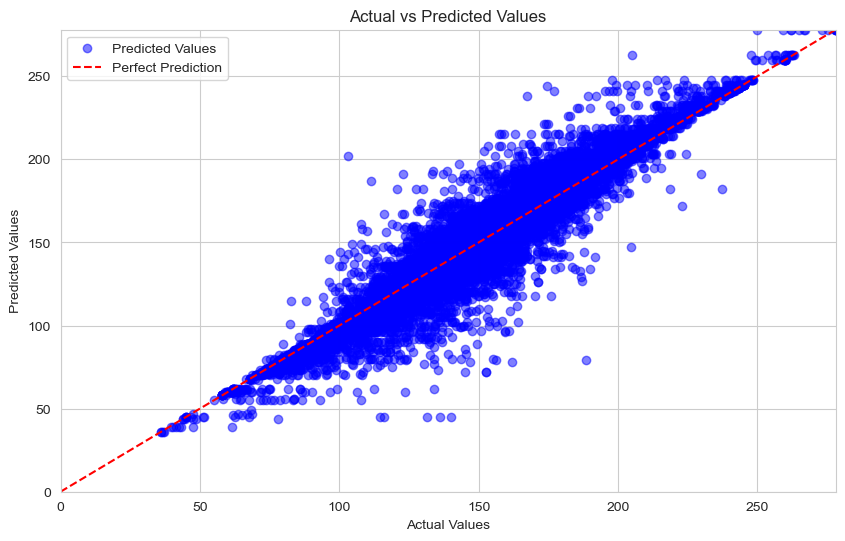

In [47]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.scatter(df['Actual'], df['Predicted'], alpha=0.5, color='b', label='Predicted Values')

max_value = max(df['Actual'].max(), df['Predicted'].max())
plt.plot([0, max_value], [0, max_value], color='r', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xlim([0, max_value])
plt.ylim([0, max_value])

plt.show()
